 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale=pd.read_csv("C:/Users/User/Desktop/Boot Camp/whale_returns.csv",parse_dates=True, infer_datetime_format=True)
whale["Date"]=pd.to_datetime(whale["Date"])
whale=whale.set_index("Date")

In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale=whale.dropna()
whale.isnull().sum()
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo=pd.read_csv("C:/Users/User/Desktop/Boot Camp/algo_returns.csv",parse_dates=True, infer_datetime_format=True)
algo["Date"]=pd.to_datetime(algo["Date"])
algo=algo.set_index("Date")

In [6]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo=algo.dropna()
algo.isnull().sum()
algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx=pd.read_csv("C:/Users/User/Desktop/Boot Camp/sp_tsx_history.csv",parse_dates=True, infer_datetime_format=True)
sp_tsx["Date"]=pd.to_datetime(sp_tsx["Date"])
sp_tsx=sp_tsx.set_index("Date")

In [9]:
# Check Data Types
sp_tsx.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx["Close"]=sp_tsx["Close"].str.replace("$","",regex=True)
sp_tsx["Close"]=sp_tsx["Close"].str.replace(",","",regex=True)
sp_tsx["Close"]=sp_tsx["Close"].astype('float')
sp_tsx.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [11]:
# Calculate Daily Returns
sp_tsx= sp_tsx.pct_change()

In [12]:
# Drop nulls
sp_tsx=sp_tsx.dropna()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx=sp_tsx.rename(columns={"Close":"TSX"})
sp_tsx.head()

,TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_return=pd.concat([whale,algo,sp_tsx],axis=1,join="inner")
all_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

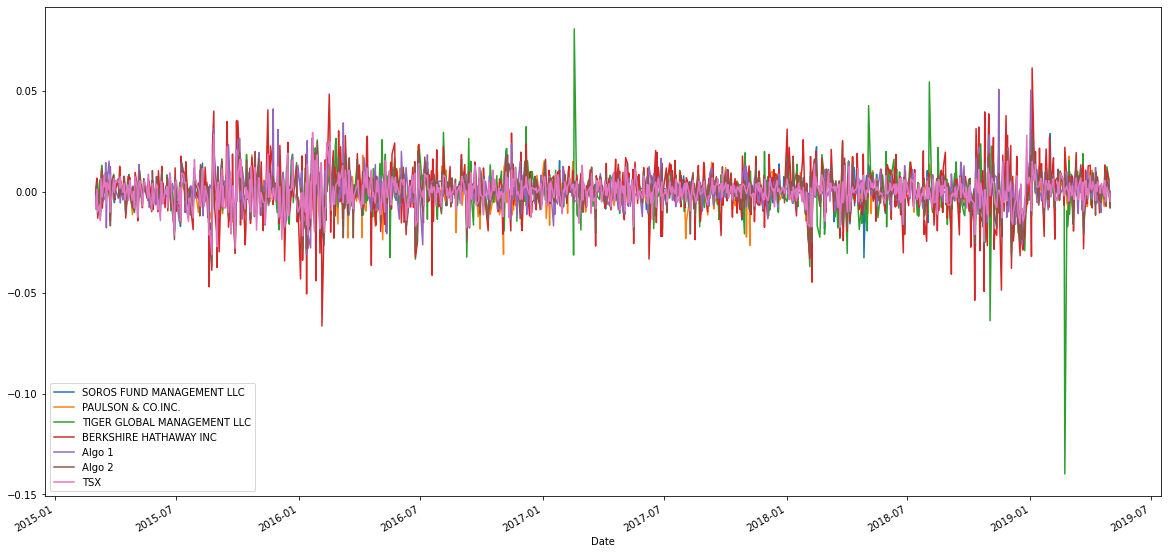

In [15]:
# Plot daily returns of all portfolios
all_return.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

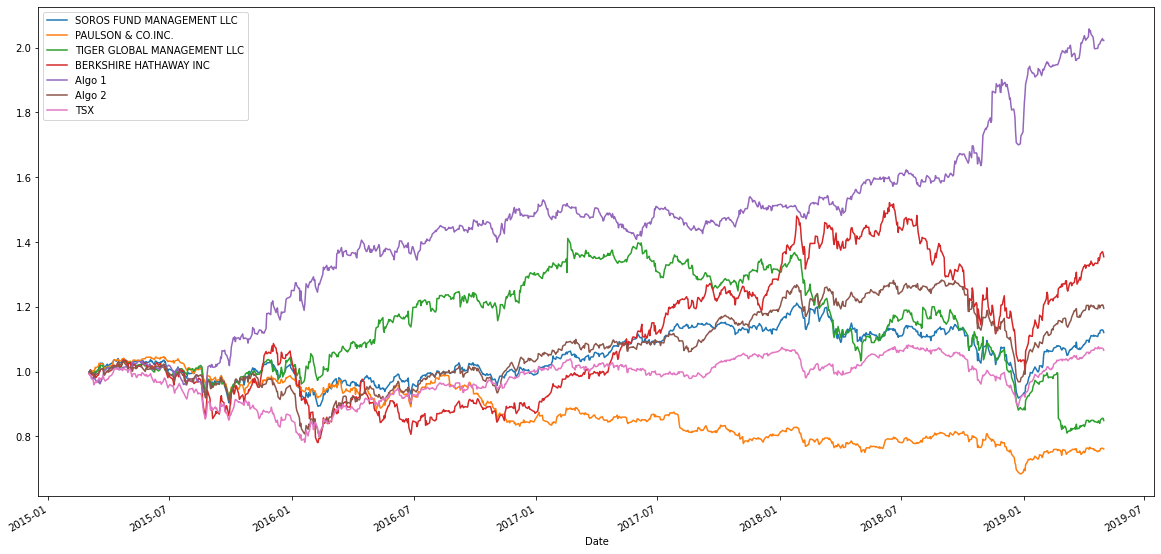

In [16]:
# Calculate cumulative returns of all portfolios
all_return_cumulative=(1+all_return).cumprod()
# Plot cumulative returns
all_return_cumulative.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

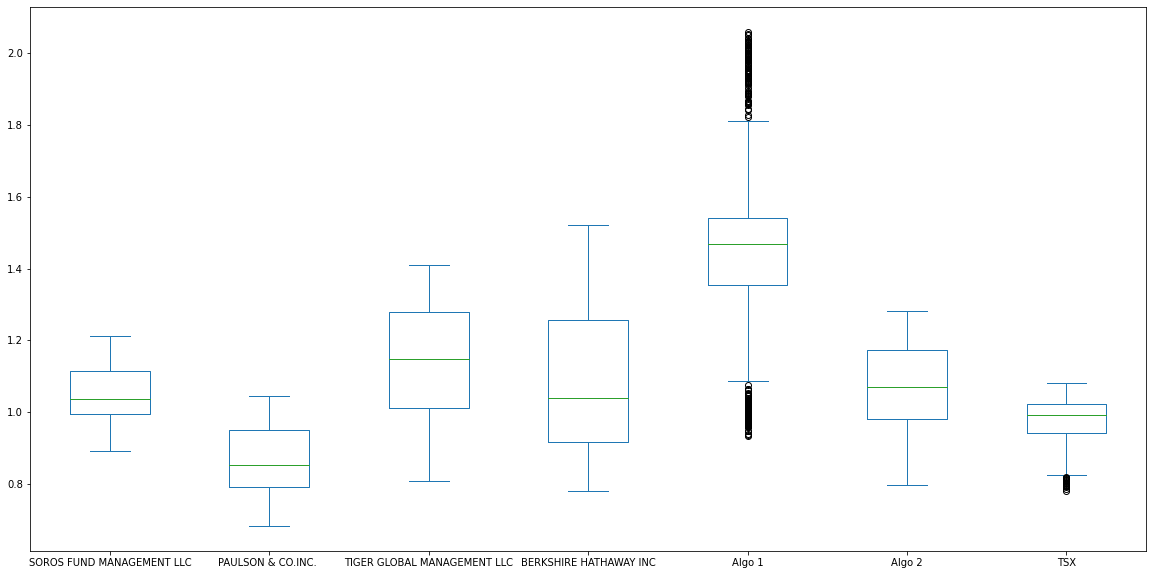

In [17]:
# Box plot to visually show risk
all_return_cumulative.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
# Calculate  the daily standard deviation of S&P TSX 60
all_return_std=all_return.std()
all_return_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
TSX                            0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Determine which portfolios are riskier than the S&P TSX 60
# ANS: SOROS FUND MANAGEMENT LLC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
all_return_std=all_return_std*np.sqrt(252)
all_return_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
TSX                            0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

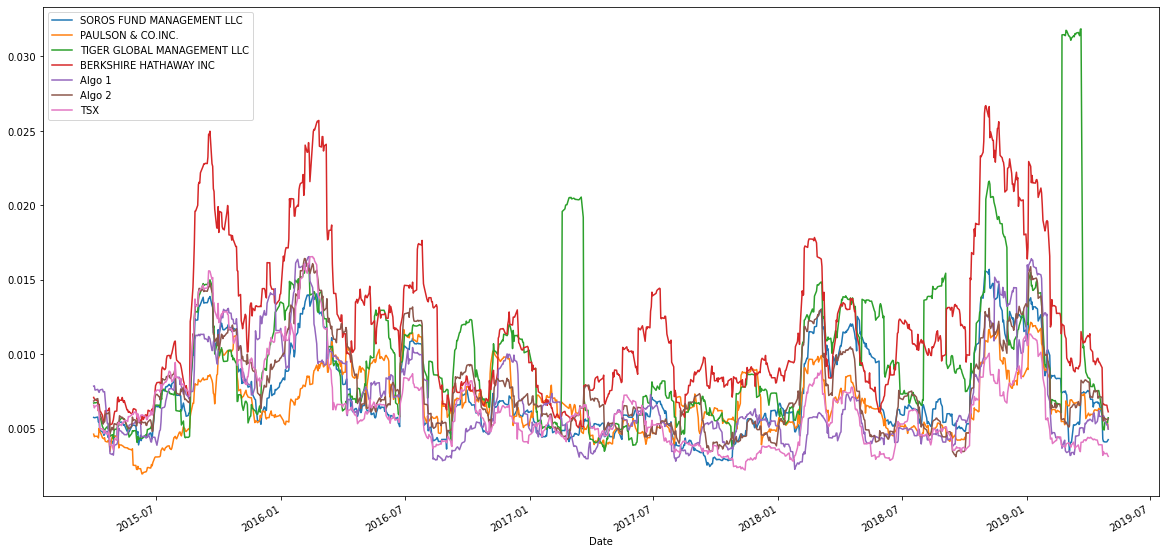

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_return_21=all_return.rolling(window=21).std()
# Plot the rolling standard deviation
all_return_21.plot(figsize=(20,10))

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
all_return_cor=all_return.corr()
# Display de correlation matrix
all_return_cor

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

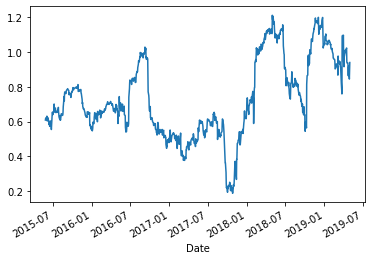

In [23]:
# Calculate 60 days rolling covariance of a single portfolio
cov_tsx_sor=all_return['TSX'].rolling(window=60).cov(all_return['SOROS FUND MANAGEMENT LLC'])
# Calculate 60 days rolling variance of S&P TSX
sp_tsx_var=all_return["TSX"].rolling(window=60).var()
# Computing beta
Soros_beta= cov_tsx_sor/sp_tsx_var
# Plot beta trend
Soros_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

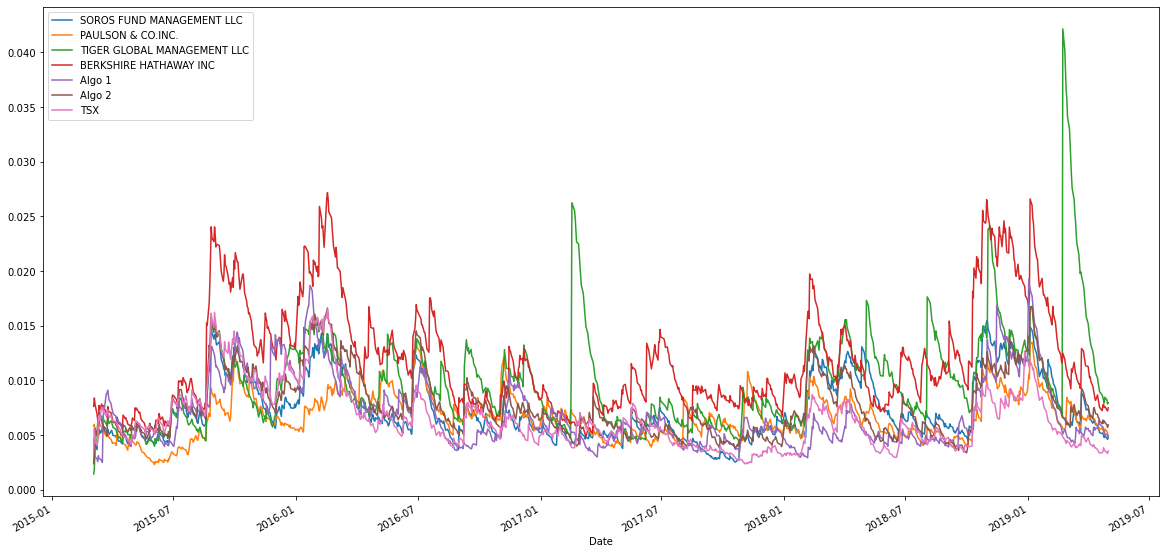

In [24]:
# Use `ewm` to calculate the rolling window
all_return_ewm=all_return.ewm(span=21,adjust=False).std()
all_return_ewm.plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
# I use TSX as risk free return to calculate Sharpe ratios
all_return_Sharpe=(all_return.mean()-all_return["TSX"].mean())*252/all_return.std()*np.sqrt(252)

<AxesSubplot:>

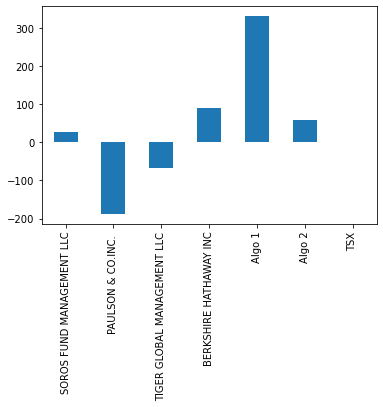

In [26]:
# Visualize the sharpe ratios as a bar plot
all_return_Sharpe.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Yes, the Algo 1 strategy outperforms both the market and the whales portfolios, but the Algo 2 only beats the market. Berkshire Hathaway performs slightly better than the Algo 2.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
ENB=pd.read_csv("C:/Users/User/Desktop/Boot Camp/ENBBQ.csv",parse_dates=True, infer_datetime_format=True)
ENB["Date"]=pd.to_datetime(ENB["Date"],dayfirst=True).dt.date
ENB=ENB.set_index("Date")
ENB.head()

,Close
Date,
2015-09-03,40.81
2015-09-04,40.44
2015-09-08,40.75
2015-09-09,40.40
2015-09-10,40.24


In [28]:
# Reading data from 2nd stock
SU=pd.read_csv("C:/Users/User/Desktop/Boot Camp/SUUUQ.csv",parse_dates=True, infer_datetime_format=True)
SU["Date"]=pd.to_datetime(SU["Date"],dayfirst=True).dt.date
SU=SU.set_index("Date")
SU.head()

,Close
Date,
2015-09-03,26.49
2015-09-04,26.36
2015-09-08,26.56
2015-09-09,26.22
2015-09-10,26.47


In [29]:
# Reading data from 3rd stock
RY=pd.read_csv("C:/Users/User/Desktop/Boot Camp/RYYYQ.csv",parse_dates=True, infer_datetime_format=True)
RY["Date"]=pd.to_datetime(RY["Date"],dayfirst=True).dt.date
RY=RY.set_index("Date")
RY.head()

,Close
Date,
2015-09-03,54.46
2015-09-04,53.43
2015-09-08,54.70
2015-09-09,54.68
2015-09-10,54.71


In [30]:
# Combine all stocks in a single DataFrame
myportfolio=pd.concat([ENB,SU,RY],axis=1,join="inner")
myportfolio.head()

,Close,Close,Close
Date,,,
2015-09-03,40.81,26.49,54.46
2015-09-04,40.44,26.36,53.43
2015-09-08,40.75,26.56,54.70
2015-09-09,40.40,26.22,54.68
2015-09-10,40.24,26.47,54.71


In [31]:
# Reorganize portfolio data by having a column per symbol
myportfolio.columns = ['ENB', 'SU', 'RY']
myportfolio.head()

,ENB,SU,RY
Date,,,
2015-09-03,40.81,26.49,54.46
2015-09-04,40.44,26.36,53.43
2015-09-08,40.75,26.56,54.70
2015-09-09,40.40,26.22,54.68
2015-09-10,40.24,26.47,54.71


In [32]:
# Calculate daily returns
myportfolio=myportfolio.pct_change()
# Drop NAs
myportfolio=myportfolio.dropna()
# Display sample data
myportfolio.head()

,ENB,SU,RY
Date,,,
2015-09-04,-0.009066,-0.004908,-0.018913
2015-09-08,0.007666,0.007587,0.023769
2015-09-09,-0.008589,-0.012801,-0.000366
2015-09-10,-0.003960,0.009535,0.000549
2015-09-11,-0.026590,-0.027201,-0.001462


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
myportfolio=myportfolio.dot(weights)
# Display sample data
myportfolio.head()

Date
2015-09-04   -0.010962
2015-09-08    0.013007
2015-09-09   -0.007252
2015-09-10    0.002041
2015-09-11   -0.018418
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
returnforall=pd.concat([all_return,myportfolio],axis=1,join="inner")

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returnforall=returnforall.dropna()
returnforall=returnforall.rename(columns={0:"Myreturn"})
returnforall.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX,Myreturn
Date,,,,,,,,
2015-09-04,-0.009752,-0.001393,-0.011553,-0.029778,-0.008472,-0.005795,-0.008686,-0.010962
2015-09-08,0.015055,0.008984,0.016259,0.015084,0.001223,0.015972,0.011304,0.013007
2015-09-09,-0.006733,-0.010876,-0.009149,0.010727,0.007693,-0.007735,-0.007250,-0.007252
2015-09-10,0.001680,-0.000497,0.001536,-0.006015,-0.005218,0.004262,0.002811,0.002041
2015-09-11,0.001460,0.002206,0.003168,0.003708,0.005597,0.001546,-0.007990,-0.018418


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
returnforall_std=returnforall.std()*np.sqrt(252)
returnforall_std

SOROS FUND MANAGEMENT LLC      0.125105
PAULSON & CO.INC.              0.114745
TIGER GLOBAL MANAGEMENT LLC    0.178777
BERKSHIRE HATHAWAY INC         0.207315
Algo 1                         0.121209
Algo 2                         0.132577
TSX                            0.108330
Myreturn                       0.198415
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

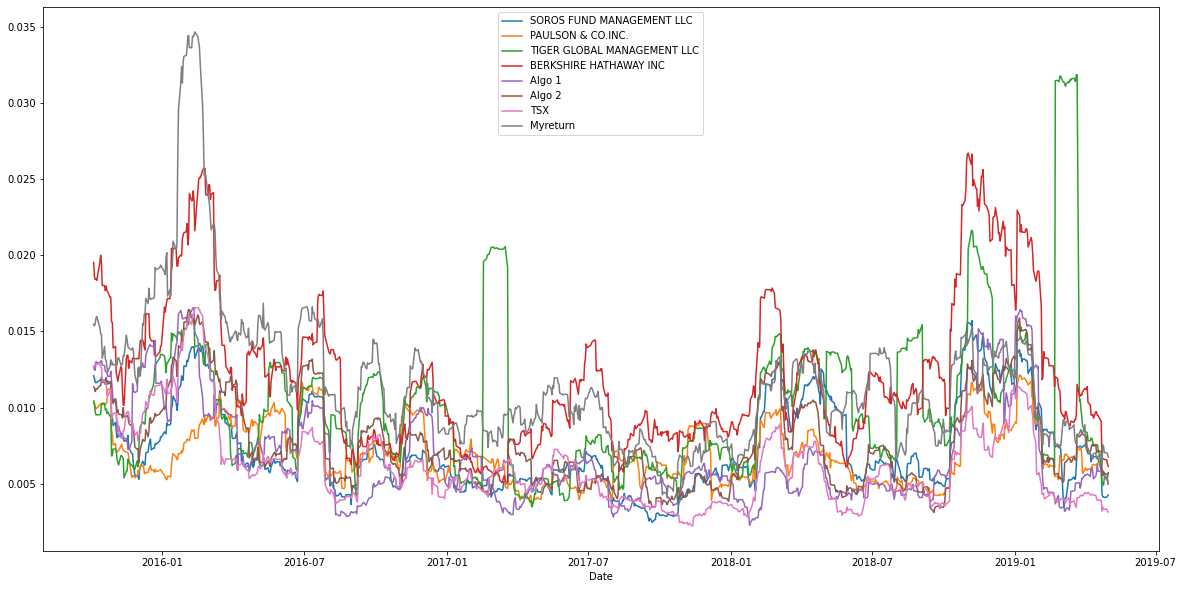

In [37]:
# Calculate rolling standard deviation
returnforall_21=returnforall.rolling(window=21).std()
# Plot rolling standard deviation
returnforall_21.plot(figsize=(20,10))

### Calculate and plot the correlation

In [38]:
# Calculate and plot the correlation
returnforall_cor=returnforall.corr()
returnforall_cor

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX,Myreturn
SOROS FUND MANAGEMENT LLC,1.000000,0.688700,0.534231,0.744103,0.295357,0.822677,0.653530,0.549790
PAULSON & CO.INC.,0.688700,1.000000,0.409102,0.526853,0.258945,0.668971,0.471968,0.409772
TIGER GLOBAL MANAGEMENT LLC,0.534231,0.409102,1.000000,0.395295,0.148079,0.475594,0.409758,0.356292
BERKSHIRE HATHAWAY INC,0.744103,0.526853,0.395295,1.000000,0.277414,0.673701,0.536077,0.416391
Algo 1,0.295357,0.258945,0.148079,0.277414,1.000000,0.280530,0.289506,0.327904
Algo 2,0.822677,0.668971,0.475594,0.673701,0.280530,1.000000,0.732799,0.629011
TSX,0.653530,0.471968,0.409758,0.536077,0.289506,0.732799,1.000000,0.786608
Myreturn,0.549790,0.409772,0.356292,0.416391,0.327904,0.629011,0.786608,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

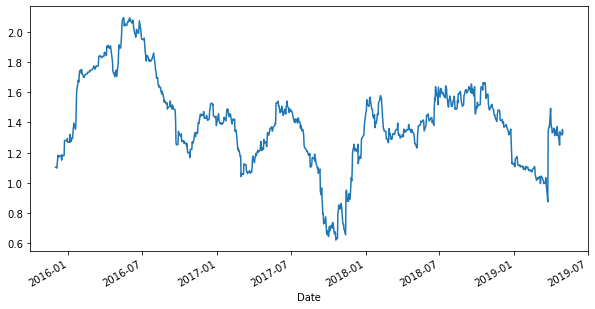

In [39]:
# Calculate and plot Beta
cov_tsx_My=returnforall['TSX'].rolling(window=60).cov(returnforall['Myreturn'])
Myreturn_beta= cov_tsx_My/sp_tsx_var
Myreturn_beta.plot(figsize=(10,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratio
# I use TSX as risk free return to calculate Sharpe ratios
returnforall_Sharpe=(returnforall.mean()-returnforall["TSX"].mean())*252/returnforall.std()*np.sqrt(252)

<AxesSubplot:>

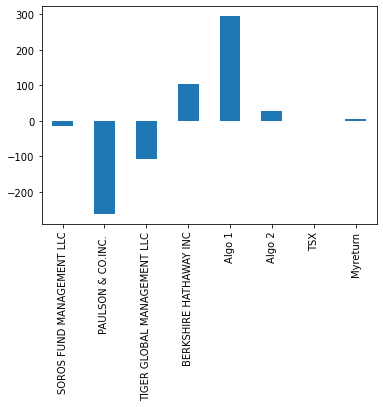

In [41]:
# Visualize the sharpe ratios as a bar plot
returnforall_Sharpe.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
# My portfolio is slightly better than the index, but Algo 1 is still the best among all the portfolios.